# @WeRateDogs Twitter Archive - A Data Wrangling Project

[@WeRateDogs](https://twitter.com/dog_rates) is a Twitter account that makes humorous comments on pictures and videos of dogs, when making comments he normally uses common internet lingo. He also gives a ranking or score to the dog (not the picture); normally this ranking system is humorous since it supposed to be from 1 to 10 but it is almost always above 10.

The purpose of this project is to gather, assess, clean and analyse data obtained from Twitter user @WeRateDogs and provide any significant insights.

## 1.0 Discussing the datasets

There are three main datasets that are going to be used in this project:

### 1.1 Enhanced Twitter Archive
This data was given by Udacity, it is a Twitter Archive but it has also been "enhanced". This "enhancement" was the programamtical extraction of new variables from the body of the tweet (Ex. rating numerator, rating denominator, lingo used to refer the dog...). The columns of the dataset are as they follow:

- **tweet_id**: tweet identification number.
- **in_reply_to_status_id**: reply identification number.
- **in_reply_to_user_id**:
- **timestamp**: date and time of the tweet/reply.
- **source**: source from where the tweet was written and sent.
- **text**: text of the tweet.
- **retweeted_status_id**: id of the retweet.
- **retweeted_status_user_id**
- **retweeted_status_timestamp**: date and time of the retweet
- **expanded_urls**: URL of the tweet/reply
- **rating_numerator**: numerator of the rating given by the user.
- **rating_denominator**: denominator of the rating given by the user.
- **name**: name of the dog
- **doggo**: used to confirm if the dog was referred as a "doggo"
- **floofer**: used to confirm if the dog was referred as a "floofer"
- **pupper**: used to confirm if the dog was referred as a "pupper"
- **puppo**: used to confirm if the dog was referred as a "puppo"

It is important to mention that out of the 5,000+ tweets available, this data set contains 2,356 the reason being because these are the only ones with ratings.

### 1.2 Twitter API
In Twitter, every tweet can be liked or retweeted, the Enhanced Twitter Archive is missing data the like and retweet data for each of these tweets; these will be extracted from Twitter's API.

### 1.3 Image Predictions File
Some of the media shared by @WeRateDogs user went through a neural network that classified breeds of dogs; resulting in this database. The variables from this file would be:

- **Tweet ID**: tweet identification number.
- **jpg_URL**: URL of the image.
- **img_num**: number of images in the tweet.
- **p1**: This is the algorithm's prediction for the image in the tweet.
- **p1_conf**: This is the confidence level of the algorith for p1
- **p1_dog**: Used to confirm if p1 prediction is actually a dog breed.
- **p2**: this is the algorithm's "second guess" for the image in the tweet.
- **p2_conf**: This is the confidence level of the algorith for p2.
- **p2_dog**: Used to confirm if p2 prediction is actually a dog breed.
- **p3**: this is the algorithm's "third guess" for the image in the tweet.
- **p3_conf**: This is the confidence level of the algorith for p3.
- **p3_dog**: Used to confirm if p3 prediction is actually a dog breed.

## 2.0 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import requests as requests
# !pip install tweepy
# !pip install twython
# !pip install --upgrade seaborn
# !pip install --upgrade pandas
import tweepy as tweepy
import json as json
from twython import Twython
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\manue\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## 3.0 Gathering

This step is to gather and extract the datasets and turn them into dataframes, allowing for the cleaning of the data using Python.

### 3.1 Enhaced Twitter Archive
The Enhanced Twitter Archive has been adquired from Udacity website as a CSV file, therefore this data was extracted and turned into a dataframe using pandas.

In [2]:
Tw_Ar = pd.read_csv('twitter-archive-enhanced.csv')
Tw_Ar.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 3.2 Tweet Image Predictions
This file is currently located in Udacity's servers; to programmatically download the file we will use the *Requests* library and the URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

In [3]:
URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(URL)
#In order to confirm the data was succesfully downloaded.
r.status_code

200

The request status code being equal to 200 means that there were no errors extracting the data.

In [4]:
#The data extracted was in a 'tsv' (Tab separated values) form.
Tw_Img = pd.read_csv(URL, sep='\t')
Tw_Img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 3.3 Twitter API (Retweets and likes)
This data has to be extracted querying Twitters API using Python's Tweepy library and storing all of the tweets on a text file (either comma separated or tab separated).

In [2]:
# These are keys and tokens obtained from Twitter Developer Portal.
consumer_key = "X"
consumer_secret = 'X'
access_token = 'X'
access_secret = 'X'
bearer_token = 'X'

In [ ]:
# Tweepy library was required to access Twitter API.
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Using time library to record how long did it take to extract the data from Twitter API.
import time
id_errors = []
start = time.time()
print('Start')
# In this section, the data will be save on a file called 'tweet_json', a json file.
with open('tweet_json.txt','w') as file:
    for tweet_id in Tw_Ar.tweet_id:
        try:
            status = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(status._json, file)
            file.write('\n')
        except:
            id_errors.append(tweet_id)
end = time.time()
print('Done... it took:',end-start)

In [5]:
RT_L = []
n_mt_json = 0
with open('tweet_json.txt') as json_file:
    
    # iterate through each line
    for line in json_file:
        try:
            
            # read each json line into a dictionary
            data = json.loads(json_file.readline())
        
            # add the id, favorite_count, and retweet_count into a DataFrame
            RT_L.append({'tweet_id': data['id'], 
                         'favorite_count': data['favorite_count'], 
                         'retweet_count': data['retweet_count']})
        except Exception as e: 
            n_mt_json = n_mt_json + 1
            print('Number of empty lines in Json file:', n_mt_json)

Number of empty lines in Json file: 1


In [6]:
RT_L = pd.DataFrame(RT_L)
RT_L

,tweet_id,favorite_count,retweet_count
0,892177421306343426,29230,5277
1,891689557279858688,36777,7189
2,891087950875897856,17737,2586
3,890729181411237888,56637,15691
4,890240255349198849,27845,6075
...,...,...,...
1158,666058600524156928,99,47
1159,666055525042405380,367,196
1160,666050758794694657,115,50
1161,666044226329800704,245,115


## 4.0 Assessing
This section of the report will be to assess the data for any quality or tidiness issues the data might have.

### 4.1 Enhanced Twitter Archive Pre-Assessment

In [7]:
Tw_Ar.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
Tw_Ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
Tw_Ar.groupby('name').mean()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
name,,,,,,,
Abby,7.458612e+17,NaN,NaN,NaN,NaN,10.500,10.0
Ace,7.532945e+17,NaN,NaN,NaN,NaN,11.000,10.0
Acro,6.740193e+17,NaN,NaN,NaN,NaN,10.000,10.0
Adele,7.059751e+17,NaN,NaN,NaN,NaN,10.000,10.0
Aiden,6.740144e+17,NaN,NaN,NaN,NaN,11.000,10.0
...,...,...,...,...,...,...,...
such,8.875171e+17,NaN,NaN,NaN,NaN,14.000,10.0
the,6.753073e+17,NaN,NaN,NaN,NaN,10.375,10.0
this,7.311560e+17,NaN,NaN,NaN,NaN,204.000,170.0


In [10]:
Tw_Ar.groupby('source').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
source,,,,,,,,,,,,,,,,
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",33,0,0,33,33,2,2,2,32,33,33,33,33,33,33,33
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2221,78,78,2221,2221,179,179,179,2163,2221,2221,2221,2221,2221,2221,2221
"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",91,0,0,91,91,0,0,0,91,91,91,91,91,91,91,91
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",11,0,0,11,11,0,0,0,11,11,11,11,11,11,11,11


In [11]:
Tw_Ar.groupby('rating_denominator').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
rating_denominator,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1
2,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
7,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1
10,2333,73,73,2333,2333,2333,180,180,180,2278,2333,2333,2333,2333,2333,2333
11,3,0,0,3,3,3,1,1,1,3,3,3,3,3,3,3
15,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1
16,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1
20,2,1,1,2,2,2,0,0,0,1,2,2,2,2,2,2
40,1,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1


#### 4.1.1 Comments

-	Replies seem to be part of a different observational unit
-	Source seems to have unnecessary characters and information
-	Retweets seem to be part of a different observational unit
-	Variables “doggo”, “floofer”, “pupper” and “puppo” seem to be values of a single variable, “Internet_Nickname”.
-	Tweet ID is categorized as an integer.
-	“in_reply_to_status_id”, “in_reply_to_user_id”, “retweeted_status_id” and “retweeted_status_user_id” are categorized as floats
-	“Timestamp” and “retweeted_status_timestamp” are a combination of variables in a single variable.
-   Rating denominator is not constant, hence the actual rating needs to be calculated.
-	Several dog names are “such”, “the”, “this”, “unacceptable”…


### 4.2 Twitter Image Prediction Pre-Assessment

In [12]:
Tw_Img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
Tw_Img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [14]:
Tw_Img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
Tw_Img.groupby('p1').count()

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
p1,,,,,,,,,,,
Afghan_hound,4,4,4,4,4,4,4,4,4,4,4
African_crocodile,1,1,1,1,1,1,1,1,1,1,1
African_grey,1,1,1,1,1,1,1,1,1,1,1
African_hunting_dog,1,1,1,1,1,1,1,1,1,1,1
Airedale,12,12,12,12,12,12,12,12,12,12,12
...,...,...,...,...,...,...,...,...,...,...,...
wombat,4,4,4,4,4,4,4,4,4,4,4
wood_rabbit,3,3,3,3,3,3,3,3,3,3,3
wooden_spoon,1,1,1,1,1,1,1,1,1,1,1


In [16]:
Tw_Img.query('p1_dog == True').groupby('p1').count()

,tweet_id,jpg_url,img_num,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
p1,,,,,,,,,,,
Afghan_hound,4,4,4,4,4,4,4,4,4,4,4
Airedale,12,12,12,12,12,12,12,12,12,12,12
American_Staffordshire_terrier,13,13,13,13,13,13,13,13,13,13,13
Appenzeller,2,2,2,2,2,2,2,2,2,2,2
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,39,39,39,39,39,39,39,39,39,39,39
toy_terrier,2,2,2,2,2,2,2,2,2,2,2
vizsla,13,13,13,13,13,13,13,13,13,13,13


In [17]:
Tw_Img.query('p2_dog == True').groupby('p2').count()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2_conf,p2_dog,p3,p3_conf,p3_dog
p2,,,,,,,,,,,
Afghan_hound,5,5,5,5,5,5,5,5,5,5,5
Airedale,7,7,7,7,7,7,7,7,7,7,7
American_Staffordshire_terrier,21,21,21,21,21,21,21,21,21,21,21
Appenzeller,3,3,3,3,3,3,3,3,3,3,3
Australian_terrier,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,37,37,37,37,37,37,37,37,37,37,37
toy_terrier,20,20,20,20,20,20,20,20,20,20,20
vizsla,7,7,7,7,7,7,7,7,7,7,7


In [18]:
Tw_Img.query('p3_dog == True').groupby('p3').count()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3_conf,p3_dog
p3,,,,,,,,,,,
Afghan_hound,4,4,4,4,4,4,4,4,4,4,4
Airedale,11,11,11,11,11,11,11,11,11,11,11
American_Staffordshire_terrier,24,24,24,24,24,24,24,24,24,24,24
Appenzeller,11,11,11,11,11,11,11,11,11,11,11
Australian_terrier,8,8,8,8,8,8,8,8,8,8,8
...,...,...,...,...,...,...,...,...,...,...,...
toy_poodle,29,29,29,29,29,29,29,29,29,29,29
toy_terrier,20,20,20,20,20,20,20,20,20,20,20
vizsla,10,10,10,10,10,10,10,10,10,10,10


#### 4.2.1 Comments
- Tweet ID is categorised as an integer.
- This table should be combined with the main tweets table.

### 4.3 Retweets and Likes (API extracted) Pre-Assessment

In [19]:
RT_L.head()

,tweet_id,favorite_count,retweet_count
0,892177421306343426,29230,5277
1,891689557279858688,36777,7189
2,891087950875897856,17737,2586
3,890729181411237888,56637,15691
4,890240255349198849,27845,6075


In [20]:
RT_L.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        1163 non-null   int64
 1   favorite_count  1163 non-null   int64
 2   retweet_count   1163 non-null   int64
dtypes: int64(3)
memory usage: 27.4 KB


In [21]:
RT_L.describe()

,tweet_id,favorite_count,retweet_count
count,1.163000e+03,1163.000000,1163.000000
mean,7.417758e+17,7505.619948,2715.771281
std,6.819231e+16,12390.375945,4865.316668
min,6.660293e+17,0.000000,1.000000
25%,6.781510e+17,1187.500000,501.000000
50%,7.178418e+17,3042.000000,1239.000000
75%,7.986469e+17,8944.000000,3135.500000
max,8.921774e+17,144260.000000,70391.000000


#### 4.3.1 Comments
- Tweet ID is categorised as an integer.
- This table should be combined with the main tweets table (and retweets).

### 4.4 Assessment and categorising

#### 4.4.1 Visual and Programmatic Assessment - Quality
-	Tweet ID is categorised as an integer.
-	“in_reply_to_status_id”, “in_reply_to_user_id”, “retweeted_status_id” and “retweeted_status_user_id” are categorized as floats.
-	Several dog names are not actual dog names.
-	“Timestamp” and “retweeted_status_timestamp” are a combination of variables in a single variable.
-	Source seems to have unnecessary characters and information.
-   Rating Denominator is not constant.

#### 4.4.2 Visual and Programmatic Assessment - Tidiness
-	Variables “doggo”, “floofer”, “pupper” and “puppo” seem to be values of a single variable, “Internet_Nickname”.
-	Replies seem to be part of a different observational unit
-	Retweets seem to be part of a different observational unit
-   RT_L should be combined with the main tweets table (and retweets).

## 5.0 Cleaning

In this section of the report, we will solve the quality and tidiness issues mentioned in the assessment.

In [22]:
# Prior the commencement of the Cleaning process, we will first create copies of the DataFrames:
Tw_Ar_clean = Tw_Ar.copy()
Tw_Img_clean = Tw_Img.copy()
RT_L_clean = RT_L.copy()

### 5.1 Variables Categorised as integers

#### 5.1.1 Define
There are many variables that have been incorrectly categorised:
- tweet_id (all three tables),
- in_reply_to_status_id, 
- in_reply_to_user_id, 
- retweeted_status_id, and 
- retweeted_status_user_id.

All of these should be categorised as strings.

#### 5.1.2 Code

In [25]:
Tw_Ar_clean.tweet_id = Tw_Ar_clean.tweet_id.astype('string')
Tw_Ar_clean.in_reply_to_status_id = Tw_Ar_clean.in_reply_to_status_id.astype('string')
Tw_Ar_clean.in_reply_to_user_id = Tw_Ar_clean.in_reply_to_user_id.astype('string')
Tw_Ar_clean.retweeted_status_id = Tw_Ar_clean.retweeted_status_id.astype('string')
Tw_Ar_clean.retweeted_status_user_id = Tw_Ar_clean.retweeted_status_user_id.astype('string')
Tw_Img_clean.tweet_id = Tw_Img_clean.tweet_id.astype('string')
RT_L_clean.tweet_id = RT_L_clean.tweet_id.astype('string')

#### 5.1.3 Test

In [24]:
Tw_Ar_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   string
 1   in_reply_to_status_id       78 non-null     string
 2   in_reply_to_user_id         78 non-null     string
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         181 non-null    string
 7   retweeted_status_user_id    181 non-null    string
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

In [26]:
Tw_Img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   string 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4), string(1)
memory usage: 152.1+ KB


In [27]:
RT_L_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163 entries, 0 to 1162
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        1163 non-null   string
 1   favorite_count  1163 non-null   int64 
 2   retweet_count   1163 non-null   int64 
dtypes: int64(2), string(1)
memory usage: 27.4 KB


### 5.2 Timestamp having multiple variables

#### 5.2.1 Define

Both variables timestamp and retweeted_status_timestamp have several variables in their values (Year, Month, Day, Time).

These timestamps will be split into 'time', 'day', 'month' and 'Year'.

#### 5.2.2 Code

In [28]:
Tw_Ar_clean.timestamp.head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [29]:
Tw_Ar_clean['t_date'] = 0
Tw_Ar_clean['t_year'] = 0
Tw_Ar_clean['t_month'] = 0
Tw_Ar_clean['t_day'] = 0
Tw_Ar_clean['t_time'] = 0

# Extracting the desired string (date, year, month, day and time) from 'timestamp'
Tw_Ar_clean['t_date'] = Tw_Ar_clean.timestamp.str.extract(pat ='^(\d{4}-\d{2}-\d{2})')
Tw_Ar_clean['t_year'] = Tw_Ar_clean.timestamp.str.extract(pat ='^(\d{4})')
Tw_Ar_clean['t_month'] = Tw_Ar_clean.timestamp.str.extract(pat = '(-\d{2}-)')
Tw_Ar_clean['t_day'] = Tw_Ar_clean.timestamp.str.extract(pat = '(-\d{2} )')
Tw_Ar_clean['t_time'] = Tw_Ar_clean.timestamp.str.extract(pat = '(\d{2}:\d{2}:\d{2} )')

# Removing any additional characters extracted.
Tw_Ar_clean['t_month'] = Tw_Ar_clean['t_month'].str.replace('-','')
Tw_Ar_clean['t_day'] = Tw_Ar_clean['t_day'].str.replace('-','').str.replace(' ','')

In [31]:
# Repeat the same process as before but for the retweet 'timestamp'.
Tw_Ar_clean['rt_date'] = 0
Tw_Ar_clean['rt_year'] = 0
Tw_Ar_clean['rt_month'] = 0
Tw_Ar_clean['rt_day'] = 0
Tw_Ar_clean['rt_time'] = 0

Tw_Ar_clean['rt_date'] = Tw_Ar_clean.retweeted_status_timestamp.str.extract(pat ='^(\d{4}-\d{2}-\d{2})')
Tw_Ar_clean['rt_year'] = Tw_Ar_clean.retweeted_status_timestamp.str.extract(pat ='^(\d{4})')
Tw_Ar_clean['rt_month'] = Tw_Ar_clean.retweeted_status_timestamp.str.extract(pat = '(-\d{2}-)')
Tw_Ar_clean['rt_day'] = Tw_Ar_clean.retweeted_status_timestamp.str.extract(pat = '(-\d{2} )')
Tw_Ar_clean['rt_time'] = Tw_Ar_clean.retweeted_status_timestamp.str.extract(pat = '(\d{2}:\d{2}:\d{2} )')

Tw_Ar_clean['rt_month'] = Tw_Ar_clean['rt_month'].str.replace('-','')
Tw_Ar_clean['rt_day'] = Tw_Ar_clean['rt_day'].str.replace('-','').str.replace(' ','')

#### 5.2.3 Test

In [32]:
Tw_Ar_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,t_date,t_year,t_month,t_day,t_time,rt_date,rt_year,rt_month,rt_day,rt_time
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/892420643...,...,2017-08-01,2017,08,01,16:23:56,NaN,NaN,NaN,NaN,NaN
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/892177421...,...,2017-08-01,2017,08,01,00:17:27,NaN,NaN,NaN,NaN,NaN
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/891815181...,...,2017-07-31,2017,07,31,00:18:03,NaN,NaN,NaN,NaN,NaN
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/891689557...,...,2017-07-30,2017,07,30,15:58:51,NaN,NaN,NaN,NaN,NaN
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/891327558...,...,2017-07-29,2017,07,29,16:00:24,NaN,NaN,NaN,NaN,NaN


In [33]:
print(Tw_Ar_clean.retweeted_status_timestamp[19], '\n', Tw_Ar_clean.rt_date[19],'\n',Tw_Ar_clean.rt_year[19],'\n',
      Tw_Ar_clean.rt_month[19],'\n', Tw_Ar_clean.rt_day[19],'\n',Tw_Ar_clean.rt_time[19])

2017-07-19 00:47:34 +0000 
 2017-07-19 
 2017 
 07 
 19 
 00:47:34 


Additionally, for easier analysis we will create a new variable in which it will round up the time in which the tweet was done.

In [34]:
Tw_Ar_clean['t_time_a'] = 0
Tw_Ar_clean['rt_time_a'] = 0

# Extracting string and removing any undesired characters
Tw_Ar_clean['t_time_a'] = Tw_Ar_clean.t_time.str.extract(pat = '(\d{2}:)')
Tw_Ar_clean['t_time_a'] = Tw_Ar_clean['t_time_a'].str.replace(':','').str.replace(' ','')

Tw_Ar_clean['rt_time_a'] = Tw_Ar_clean.rt_time.str.extract(pat = '(\d{2}:)')
Tw_Ar_clean['rt_time_a'] = Tw_Ar_clean['rt_time_a'].str.replace(':','').str.replace(' ','')

# Changing value from string to integer
Tw_Ar_clean.rt_time_a = pd.to_numeric(Tw_Ar_clean.rt_time_a)
Tw_Ar_clean.t_time_a = pd.to_numeric(Tw_Ar_clean.t_time_a)
Tw_Ar_clean.rt_day = pd.to_numeric(Tw_Ar_clean.rt_day)
Tw_Ar_clean.t_day = pd.to_numeric(Tw_Ar_clean.t_day)
Tw_Ar_clean.rt_month = pd.to_numeric(Tw_Ar_clean.rt_month)
Tw_Ar_clean.t_month = pd.to_numeric(Tw_Ar_clean.t_month)
Tw_Ar_clean.rt_year = pd.to_numeric(Tw_Ar_clean.rt_year)
Tw_Ar_clean.t_year = pd.to_numeric(Tw_Ar_clean.t_year)

In [35]:
print(Tw_Ar_clean.retweeted_status_timestamp[19], '\n', Tw_Ar_clean.rt_date[19],'\n',Tw_Ar_clean.rt_year[19],'\n',
      Tw_Ar_clean.rt_month[19],'\n', Tw_Ar_clean.rt_day[19],'\n',Tw_Ar_clean.rt_time[19],'\n','\n',Tw_Ar_clean.rt_time_a[19])

2017-07-19 00:47:34 +0000 
 2017-07-19 
 2017.0 
 7.0 
 19.0 
 00:47:34  
 
 0.0


In [36]:
Tw_Ar_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,t_month,t_day,t_time,rt_date,rt_year,rt_month,rt_day,rt_time,t_time_a,rt_time_a
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/892420643...,...,8,1,16:23:56,NaN,NaN,NaN,NaN,NaN,16,NaN
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/892177421...,...,8,1,00:17:27,NaN,NaN,NaN,NaN,NaN,0,NaN
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/891815181...,...,7,31,00:18:03,NaN,NaN,NaN,NaN,NaN,0,NaN
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/891689557...,...,7,30,15:58:51,NaN,NaN,NaN,NaN,NaN,15,NaN
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/891327558...,...,7,29,16:00:24,NaN,NaN,NaN,NaN,NaN,16,NaN


### 5.3 Source column requires stripping

#### 5.3.1 Define

The source column from the Enhanced Twitter Archive is meant to be used to confirm the source of the tweet, we will strip the relevant information from the variable to create a cleaner column.

#### 5.3.2 Code

In [37]:
source_clean = []
i=0
# This code is to reduce the source data to something easier to read and understand.
for i in Tw_Ar_clean.source:
    if i == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':
        i = 'Vine'
    if i == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':
        i = 'Twitter Web Client'
    if i == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':
        i = 'Twitter for iPhone'
    if i == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':
        i = 'TweetDeck'
    source_clean.append(i)

In [38]:
# Pre-Check that the Source_clean list matches the information found on the main data archive.
l_ti = source_clean.count('Twitter for iPhone')
l_v = source_clean.count('Vine')
l_td = source_clean.count('TweetDeck')
l_tw = source_clean.count('Twitter Web Client')

print(' Twitter Web Client:',l_tw,'\n',
     'Twitter for iPhone:',l_ti,'\n',
     'Vine:',l_v,'\n',
     'TweetDeck:',l_td)

 Twitter Web Client: 33 
 Twitter for iPhone: 2221 
 Vine: 91 
 TweetDeck: 11


In [39]:
Tw_Ar_clean.groupby('source').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,t_month,t_day,t_time,rt_date,rt_year,rt_month,rt_day,rt_time,t_time_a,rt_time_a
source,,,,,,,,,,,,,,,,,,,,,
"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",33,0,0,33,33,2,2,2,32,33,...,33,33,33,2,2,2,2,2,33,2
"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",2221,78,78,2221,2221,179,179,179,2163,2221,...,2221,2221,2221,179,179,179,179,179,2221,179
"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",91,0,0,91,91,0,0,0,91,91,...,91,91,91,0,0,0,0,0,91,0
"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",11,0,0,11,11,0,0,0,11,11,...,11,11,11,0,0,0,0,0,11,0


#### 5.3.3 Test

In [40]:
Tw_Ar_clean['clean_source'] = source_clean
Tw_Ar_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,t_day,t_time,rt_date,rt_year,rt_month,rt_day,rt_time,t_time_a,rt_time_a,clean_source
0,892420643555336193,<NA>,<NA>,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,16:23:56,NaN,NaN,NaN,NaN,NaN,16,NaN,Twitter for iPhone
1,892177421306343426,<NA>,<NA>,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,00:17:27,NaN,NaN,NaN,NaN,NaN,0,NaN,Twitter for iPhone
2,891815181378084864,<NA>,<NA>,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/891815181...,...,31,00:18:03,NaN,NaN,NaN,NaN,NaN,0,NaN,Twitter for iPhone
3,891689557279858688,<NA>,<NA>,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/891689557...,...,30,15:58:51,NaN,NaN,NaN,NaN,NaN,15,NaN,Twitter for iPhone
4,891327558926688256,<NA>,<NA>,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/891327558...,...,29,16:00:24,NaN,NaN,NaN,NaN,NaN,16,NaN,Twitter for iPhone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,<NA>,<NA>,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/666049248...,...,16,00:24:50,NaN,NaN,NaN,NaN,NaN,0,NaN,Twitter for iPhone
2352,666044226329800704,<NA>,<NA>,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/666044226...,...,16,00:04:52,NaN,NaN,NaN,NaN,NaN,0,NaN,Twitter for iPhone
2353,666033412701032449,<NA>,<NA>,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/666033412...,...,15,23:21:54,NaN,NaN,NaN,NaN,NaN,23,NaN,Twitter for iPhone
2354,666029285002620928,<NA>,<NA>,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,<NA>,<NA>,NaN,https://twitter.com/dog_rates/status/666029285...,...,15,23:05:30,NaN,NaN,NaN,NaN,NaN,23,NaN,Twitter for iPhone


### 5.4 "Internet_Nickname" variable

#### 5.4.1 Define

In the Enhanced Twitter Archive there are several columns that represent if a dog is a “doggo”, “floofer”, “pupper” or “puppo”, all of these columns should be in a single column called "Internet_Nickname".

#### 5.4.2 Code

In [41]:
# code to count the amount of observations with each of the nicknames.
Tw_Ar_clean.groupby('doggo').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,t_day,t_time,rt_date,rt_year,rt_month,rt_day,rt_time,t_time_a,rt_time_a,clean_source
doggo,,,,,,,,,,,,,,,,,,,,,
None,2259,74,74,2259,2259,2259,171,171,171,2203,...,2259,2259,171,171,171,171,171,2259,171,2259
doggo,97,4,4,97,97,97,10,10,10,94,...,97,97,10,10,10,10,10,97,10,97


In [42]:
Tw_Ar_clean.groupby('floofer').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,t_day,t_time,rt_date,rt_year,rt_month,rt_day,rt_time,t_time_a,rt_time_a,clean_source
floofer,,,,,,,,,,,,,,,,,,,,,
None,2346,78,78,2346,2346,2346,181,181,181,2287,...,2346,2346,181,181,181,181,181,2346,181,2346
floofer,10,0,0,10,10,10,0,0,0,10,...,10,10,0,0,0,0,0,10,0,10


In [43]:
Tw_Ar_clean.groupby('pupper').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,t_day,t_time,rt_date,rt_year,rt_month,rt_day,rt_time,t_time_a,rt_time_a,clean_source
pupper,,,,,,,,,,,,,,,,,,,,,
None,2099,74,74,2099,2099,2099,158,158,158,2042,...,2099,2099,158,158,158,158,158,2099,158,2099
pupper,257,4,4,257,257,257,23,23,23,255,...,257,257,23,23,23,23,23,257,23,257


In [44]:
Tw_Ar_clean.groupby('puppo').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,t_day,t_time,rt_date,rt_year,rt_month,rt_day,rt_time,t_time_a,rt_time_a,clean_source
puppo,,,,,,,,,,,,,,,,,,,,,
None,2326,77,77,2326,2326,2326,176,176,176,2268,...,2326,2326,176,176,176,176,176,2326,176,2326
puppo,30,1,1,30,30,30,5,5,5,29,...,30,30,5,5,5,5,5,30,5,30


In [45]:
Tw_Ar_clean['internet_nickname'] = 0
x = 0
internet_nickname = []
# Create a list that combines all of the 'doggo', 'floofer', 'pupper' and 'puppo' information.
for x in range(2356):
    i = 0
    if Tw_Ar_clean.doggo[x] == 'doggo':
        i = 'doggo'
    if Tw_Ar_clean.floofer[x] == 'floofer':
        i = 'floofer'
    if Tw_Ar_clean.pupper[x] == 'pupper':
        i = 'pupper'
    if Tw_Ar_clean.puppo[x] == 'puppo':
        i = 'puppo'
    if i == 0:
        i = None
    internet_nickname.append(i)
internet_nickname

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'doggo',
 None,
 None,
 'puppo',
 None,
 'puppo',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'pupper',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'doggo',
 None,
 None,
 'floofer',
 None,
 None,
 'pupper',
 None,
 None,
 None,
 None,
 None,
 None,
 'pupper',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'puppo',
 None,
 None,
 None,
 None,
 None,
 None,
 'pupper',
 None,
 None,
 None,
 'pupper',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'pupper',
 None,
 'puppo',
 None,
 None,
 'pupper',
 'pupper',
 'doggo',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'pupper',
 'doggo',
 None,
 'doggo',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'doggo',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'puppo',
 None,
 None,
 '

#### 5.4.3 Test

In [46]:
Tw_Ar_clean['internet_nickname'] = internet_nickname
Tw_Ar_clean['internet_nickname']
Tw_Ar_clean.groupby('internet_nickname').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,t_day,t_time,rt_date,rt_year,rt_month,rt_day,rt_time,t_time_a,rt_time_a,clean_source
internet_nickname,,,,,,,,,,,,,,,,,,,,,
doggo,83,3,3,83,83,83,8,8,8,80,...,83,83,8,8,8,8,8,83,8,83
floofer,10,0,0,10,10,10,0,0,0,10,...,10,10,0,0,0,0,0,10,0,10
pupper,257,4,4,257,257,257,23,23,23,255,...,257,257,23,23,23,23,23,257,23,257
puppo,30,1,1,30,30,30,5,5,5,29,...,30,30,5,5,5,5,5,30,5,30


### 5.5 Invalid Dog Names

#### 5.5.1 Define
Some dog names in the Enhanced Twitter Archive are not actually names; it is suspected that when extracting the dog names some were extracted erroneously from the text.

#### 5.5.2 Code

In [47]:
pd.set_option('display.max_rows', None)
# Visual inspection of uncommon or extremely odd names for dogs
Tw_Ar_clean.groupby('name').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,t_time,rt_date,rt_year,rt_month,rt_day,rt_time,t_time_a,rt_time_a,clean_source,internet_nickname
name,,,,,,,,,,,,,,,,,,,,,
Abby,2,0,0,2,2,2,0,0,0,2,...,2,0,0,0,0,0,2,0,2,1
Ace,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Acro,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Adele,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,1
Aiden,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Aja,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Akumi,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Al,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Albert,2,0,0,2,2,2,0,0,0,2,...,2,0,0,0,0,0,2,0,2,1


In [48]:
# List of the invalid names found during the visual inspection
invalid_names =['a','actually','all','an','by','getting','his','incredibly','infuriating','just','life','light','mad',
      'my','not','officially','old','one','quite','space','such','the','this','unacceptable','very']
clean_name = []
x=0
# Function to check names on the 'name' column against the invalid names and storing the valid names in a new column
for x in range(2356):
    if Tw_Ar_clean.name[x] in invalid_names:
        x = None
    else:
        x = Tw_Ar_clean.name[x]
    clean_name.append(x)

clean_name

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 None,
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 None,
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 '

#### 5.5.3 Test

In [49]:
Tw_Ar_clean['clean_name'] = clean_name
Tw_Ar_clean.groupby('clean_name').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,t_time,rt_date,rt_year,rt_month,rt_day,rt_time,t_time_a,rt_time_a,clean_source,internet_nickname
clean_name,,,,,,,,,,,,,,,,,,,,,
Abby,2,0,0,2,2,2,0,0,0,2,...,2,0,0,0,0,0,2,0,2,1
Ace,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Acro,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Adele,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,1
Aiden,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Aja,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Akumi,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Al,1,0,0,1,1,1,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
Albert,2,0,0,2,2,2,0,0,0,2,...,2,0,0,0,0,0,2,0,2,1


### 5.6 Combine Tables

#### 5.6.1 Define
All of these tables can be merged onto a single dataframe, this would make the visual exploration and explanatory steps much easier to perform.

#### 5.6.2 Code

In [50]:
# Joining the Twitter Archive database with the the Image Prediction database
Tw_CDF = Tw_Ar_clean.join(Tw_Img_clean.set_index('tweet_id'), on='tweet_id')
# Joining the Twitter Archive + Image Prediction databse with the twitter API (likes and retweets) databse
Tw_CDF = Tw_CDF.join(RT_L_clean.set_index('tweet_id'), on='tweet_id')

# Dropping the old columns
old_columns = ['source','timestamp','doggo','floofer','pupper','puppo','name','retweeted_status_timestamp']
Tw_CDF = Tw_CDF.drop(old_columns,axis=1)

#### 5.6.3 Test

In [51]:
Tw_CDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  2356 non-null   object 
 1   in_reply_to_status_id     78 non-null     string 
 2   in_reply_to_user_id       78 non-null     string 
 3   text                      2356 non-null   object 
 4   retweeted_status_id       181 non-null    string 
 5   retweeted_status_user_id  181 non-null    string 
 6   expanded_urls             2297 non-null   object 
 7   rating_numerator          2356 non-null   int64  
 8   rating_denominator        2356 non-null   int64  
 9   t_date                    2356 non-null   object 
 10  t_year                    2356 non-null   int64  
 11  t_month                   2356 non-null   int64  
 12  t_day                     2356 non-null   int64  
 13  t_time                    2356 non-null   object 
 14  rt_date 

### 5.7 Calculating Actual Rating
#### 5.7.1 Define
The rating_denominator values are not constantly 10 meaning that it is not possible to compare ratings using just the rating_numerator. A solution for this would be to calculate the actual rating from the rating numerator and denominator.

#### 5.7.2 Code

In [52]:
Actual_Rating = []
for i in range(2356):
    a=0
    if Tw_CDF.rating_numerator[i] / Tw_CDF.rating_denominator[i] < 20:
        a = Tw_CDF.rating_numerator[i] / Tw_CDF.rating_denominator[i]
    else:
        a = 0
    Actual_Rating.append(a)
    i = i+1
Actual_Rating

c:\Users\manue\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in longlong_scalars
  after removing the cwd from sys.path.


[1.3,
 1.3,
 1.2,
 1.3,
 1.2,
 1.3,
 1.3,
 1.3,
 1.3,
 1.4,
 1.3,
 1.3,
 1.3,
 1.2,
 1.3,
 1.3,
 1.2,
 1.3,
 1.3,
 1.3,
 1.2,
 1.3,
 1.4,
 1.3,
 1.3,
 1.2,
 1.3,
 1.3,
 1.3,
 1.2,
 1.2,
 1.3,
 1.2,
 1.2,
 1.3,
 1.4,
 1.3,
 1.3,
 1.2,
 1.3,
 1.3,
 1.4,
 1.3,
 1.2,
 1.2,
 0.5,
 1.3,
 1.3,
 1.3,
 1.2,
 1.3,
 1.3,
 1.3,
 1.2,
 1.3,
 1.7,
 1.4,
 1.2,
 1.3,
 1.2,
 1.2,
 1.2,
 1.1,
 1.3,
 1.4,
 1.2,
 1.3,
 1.2,
 1.4,
 1.1,
 1.3,
 1.3,
 1.3,
 1.3,
 1.1,
 1.3,
 1.4,
 1.3,
 1.4,
 1.2,
 1.3,
 1.2,
 1.2,
 1.4,
 1.3,
 1.3,
 1.3,
 1.3,
 1.3,
 1.2,
 1.2,
 1.2,
 1.3,
 1.2,
 1.3,
 1.4,
 1.3,
 1.2,
 1.2,
 1.2,
 1.3,
 1.4,
 1.3,
 1.2,
 1.3,
 1.2,
 1.3,
 1.2,
 1.2,
 1.2,
 1.4,
 1.3,
 1.1,
 1.0,
 1.3,
 1.3,
 1.3,
 1.4,
 1.2,
 1.3,
 1.3,
 1.2,
 1.3,
 1.4,
 1.2,
 1.3,
 1.2,
 1.2,
 1.3,
 1.2,
 1.3,
 1.3,
 1.3,
 1.3,
 1.2,
 1.3,
 1.2,
 1.2,
 1.3,
 1.3,
 1.3,
 1.4,
 1.2,
 1.3,
 1.3,
 1.3,
 1.3,
 1.2,
 1.2,
 1.4,
 1.3,
 1.3,
 1.1,
 1.3,
 1.3,
 1.3,
 1.3,
 1.3,
 1.2,
 1.3,
 1.3,
 1.3,
 1.3,
 1.2,
 1.4,
 1.0,
 1.2

In [53]:
Tw_CDF['Actual_Rating'] = Actual_Rating

#### 5.7.3 Test

In [54]:
Tw_CDF.groupby('Actual_Rating').count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,t_date,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
Actual_Rating,,,,,,,,,,,,,,,,,,,,,
0.000000,7,4,4,7,0,0,4,7,7,7,...,4,4,4,4,4,4,4,4,5,5
0.100000,8,3,3,8,1,1,5,8,8,8,...,4,4,4,4,4,4,4,4,4,4
0.200000,11,1,1,11,0,0,10,11,11,11,...,10,10,10,10,10,10,10,10,6,6
0.300000,19,0,0,19,0,0,19,19,19,19,...,19,19,19,19,19,19,19,19,10,10
0.400000,15,0,0,15,0,0,15,15,15,15,...,15,15,15,15,15,15,15,15,12,12
0.500000,38,2,2,38,1,1,36,38,38,38,...,35,35,35,35,35,35,35,35,18,18
0.600000,32,0,0,32,0,0,32,32,32,32,...,32,32,32,32,32,32,32,32,16,16
0.636364,1,0,0,1,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
0.700000,54,2,2,54,1,1,52,54,54,54,...,51,51,51,51,51,51,51,51,28,28


### 5.8 Separate Observational Units
#### 5.8.1 Define
There are several observational units in the main twitter dataframe, ideally we would like to separate the main table into a tweet table, retweet table and a reply table.

#### 5.8.2 Code

In [55]:
# Create a list of unwanted columns for each of the tables.

tw_uw = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id',
        'rt_date','rt_year','rt_month','rt_day','rt_time']
rt_uw = ['in_reply_to_status_id','in_reply_to_user_id','t_date','t_year','t_month','t_day','t_time']
r_uw = ['retweeted_status_id','retweeted_status_user_id','t_date','t_year','t_month','t_day','t_time'
       ,'rt_date','rt_year','rt_month','rt_day','rt_time','t_time_a','rt_time_a']

In [56]:
# According to the corresponding dataframe, remove their respective unwanted columns

tw_DF = Tw_CDF.copy()
rt_DF = Tw_CDF.copy()
r_DF = Tw_CDF.copy()

tw_DF = tw_DF.drop(tw_uw,axis=1)
rt_DF = rt_DF.drop(rt_uw,axis=1)
r_DF = r_DF.drop(r_uw,axis=1)

In [57]:
tw_DF = Tw_CDF.copy()
tw_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  2356 non-null   object 
 1   in_reply_to_status_id     78 non-null     string 
 2   in_reply_to_user_id       78 non-null     string 
 3   text                      2356 non-null   object 
 4   retweeted_status_id       181 non-null    string 
 5   retweeted_status_user_id  181 non-null    string 
 6   expanded_urls             2297 non-null   object 
 7   rating_numerator          2356 non-null   int64  
 8   rating_denominator        2356 non-null   int64  
 9   t_date                    2356 non-null   object 
 10  t_year                    2356 non-null   int64  
 11  t_month                   2356 non-null   int64  
 12  t_day                     2356 non-null   int64  
 13  t_time                    2356 non-null   object 
 14  rt_date 

In [58]:
# Remove all of the observations in rt_DF and r_DF that do not have any retweet nor replies values.

rt_DF = rt_DF[rt_DF.retweeted_status_id != '<NA>']
r_DF = r_DF[r_DF.in_reply_to_status_id != '<NA>']

#### 5.8.3 Test

In [59]:
tw_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  2356 non-null   object 
 1   in_reply_to_status_id     78 non-null     string 
 2   in_reply_to_user_id       78 non-null     string 
 3   text                      2356 non-null   object 
 4   retweeted_status_id       181 non-null    string 
 5   retweeted_status_user_id  181 non-null    string 
 6   expanded_urls             2297 non-null   object 
 7   rating_numerator          2356 non-null   int64  
 8   rating_denominator        2356 non-null   int64  
 9   t_date                    2356 non-null   object 
 10  t_year                    2356 non-null   int64  
 11  t_month                   2356 non-null   int64  
 12  t_day                     2356 non-null   int64  
 13  t_time                    2356 non-null   object 
 14  rt_date 

In [60]:
rt_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  181 non-null    object 
 1   text                      181 non-null    object 
 2   retweeted_status_id       181 non-null    string 
 3   retweeted_status_user_id  181 non-null    string 
 4   expanded_urls             180 non-null    object 
 5   rating_numerator          181 non-null    int64  
 6   rating_denominator        181 non-null    int64  
 7   rt_date                   181 non-null    object 
 8   rt_year                   181 non-null    float64
 9   rt_month                  181 non-null    float64
 10  rt_day                    181 non-null    float64
 11  rt_time                   181 non-null    object 
 12  t_time_a                  181 non-null    int64  
 13  rt_time_a                 181 non-null    float64
 14  clean_so

In [61]:
r_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 30 to 2298
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               78 non-null     object 
 1   in_reply_to_status_id  78 non-null     string 
 2   in_reply_to_user_id    78 non-null     string 
 3   text                   78 non-null     object 
 4   expanded_urls          23 non-null     object 
 5   rating_numerator       78 non-null     int64  
 6   rating_denominator     78 non-null     int64  
 7   clean_source           78 non-null     object 
 8   internet_nickname      8 non-null      object 
 9   clean_name             78 non-null     object 
 10  jpg_url                23 non-null     object 
 11  img_num                23 non-null     float64
 12  p1                     23 non-null     object 
 13  p1_conf                23 non-null     float64
 14  p1_dog                 23 non-null     object 
 15  p2   

## 6.0 Storing
In this step we will store the Master DataFrame in a CSV file (in this case, several).

In [62]:
Tw_CDF.to_csv('twitter_archive_master.csv')
tw_DF.to_csv('tweet_archive.csv')
rt_DF.to_csv('retweet_archive.csv')
r_DF.to_csv('reply_archive.csv')

## 7.0 Analysing and Visualisating Data

In this section of the report we will initially perform some exploratory visualisation but then explore the following questions:
- What is the user's most used platform/device to tweet from?
- What is the best time to tweet according to previous user engagement?
- Is there a difference between like and retweet engagement?
- Does the user have a preference to certain dog breeds (According to rating)?
- Does the user have a preference when using the internet dog names?
- Does the user continuously rate dogs throughout the year?



### 7.1 Tweet Dataframe

In [65]:
tw_DF.info()
tw_DF.groupby('t_time_a').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweet_id                  2356 non-null   object 
 1   in_reply_to_status_id     78 non-null     string 
 2   in_reply_to_user_id       78 non-null     string 
 3   text                      2356 non-null   object 
 4   retweeted_status_id       181 non-null    string 
 5   retweeted_status_user_id  181 non-null    string 
 6   expanded_urls             2297 non-null   object 
 7   rating_numerator          2356 non-null   int64  
 8   rating_denominator        2356 non-null   int64  
 9   t_date                    2356 non-null   object 
 10  t_year                    2356 non-null   int64  
 11  t_month                   2356 non-null   int64  
 12  t_day                     2356 non-null   int64  
 13  t_time                    2356 non-null   object 
 14  rt_date 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,rating_denominator,t_date,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,Actual_Rating
t_time_a,,,,,,,,,,,,,,,,,,,,,
0,291,10,10,291,23,23,285,291,291,291,...,263,263,263,263,263,263,263,132,132,291
1,328,7,7,328,32,32,322,328,328,328,...,295,295,295,295,295,295,295,162,162,328
2,255,3,3,255,29,29,251,255,255,255,...,223,223,223,223,223,223,223,126,126,255
3,199,8,8,199,12,12,197,199,199,199,...,178,178,178,178,178,178,178,103,103,199
4,112,8,8,112,5,5,105,112,112,112,...,96,96,96,96,96,96,96,59,59,112
5,30,2,2,30,1,1,28,30,30,30,...,26,26,26,26,26,26,26,14,14,30
6,5,1,1,5,0,0,4,5,5,5,...,3,3,3,3,3,3,3,3,3,5
12,2,2,2,2,0,0,0,2,2,2,...,0,0,0,0,0,0,0,1,1,2
13,5,1,1,5,2,2,4,5,5,5,...,2,2,2,2,2,2,2,3,3,5


In [66]:
# Finding a correlation between the columns of the dataframe.
tw_DF.corr()

,rating_numerator,rating_denominator,t_year,t_month,t_day,rt_year,rt_month,rt_day,t_time_a,rt_time_a,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,Actual_Rating
rating_numerator,1.000000,0.150388,0.052318,-0.031836,-0.006373,0.130697,-0.011720,-0.022971,0.033203,0.118144,-0.000391,-0.009132,-0.020315,-0.003890,0.003148,0.002622,0.009574
rating_denominator,0.150388,1.000000,-0.002043,-0.038120,-0.005161,-0.018387,-0.014035,-0.057873,-0.028155,-0.073967,-0.004100,-0.004328,-0.034396,0.006823,-0.011454,-0.010947,0.003527
t_year,0.052318,-0.002043,1.000000,-0.706122,-0.099626,0.685438,-0.360882,-0.112152,0.083076,-0.003908,0.204474,0.086715,-0.004489,-0.031320,0.389510,0.288034,0.259906
t_month,-0.031836,-0.038120,-0.706122,1.000000,0.095891,-0.509995,0.352496,0.101318,0.023431,-0.001300,-0.107366,-0.024904,0.012072,-0.000645,-0.117389,-0.079702,-0.112981
t_day,-0.006373,-0.005161,-0.099626,0.095891,1.000000,-0.084369,0.002514,0.291790,0.008263,-0.061931,-0.020989,0.004825,-0.000871,-0.007501,-0.033745,-0.052814,-0.040831
rt_year,0.130697,-0.018387,0.685438,-0.509995,-0.084369,1.000000,-0.727410,-0.168795,-0.118667,0.091904,-0.018446,0.009254,0.020468,-0.025709,NaN,-0.106519,0.130838
rt_month,-0.011720,-0.014035,-0.360882,0.352496,0.002514,-0.727410,1.000000,0.127313,0.094361,-0.061227,0.127952,-0.041937,-0.068184,0.063976,NaN,-0.033272,-0.011541
rt_day,-0.022971,-0.057873,-0.112152,0.101318,0.291790,-0.168795,0.127313,1.000000,0.019221,-0.129158,-0.045382,0.023830,-0.066260,0.047153,NaN,-0.023724,-0.022249
t_time_a,0.033203,-0.028155,0.083076,0.023431,0.008263,-0.118667,0.094361,0.019221,1.000000,0.121739,0.026430,0.001806,-0.004280,-0.007982,0.061640,0.036346,0.070955
rt_time_a,0.118144,-0.073967,-0.003908,-0.001300,-0.061931,0.091904,-0.061227,-0.129158,0.121739,1.000000,-0.145130,-0.207443,0.089878,0.165759,NaN,-0.039530,0.118973


Text(0.5, 1.0, 'Correlation Between Tweet Dataframe Columns')

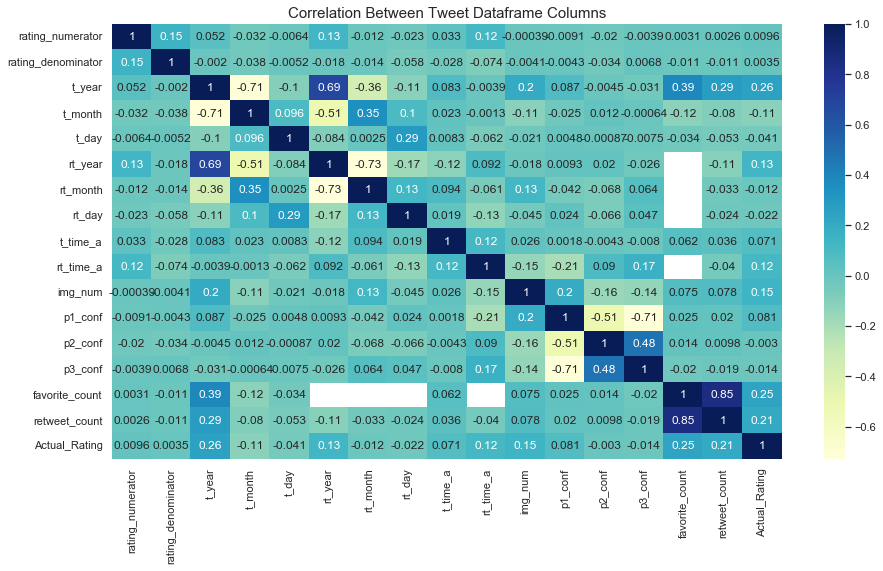

In [67]:
# Using the correlation information calculated before, perform a heatmap analysis
hm_tw = sns.set(rc = {'figure.figsize':(15,8),'axes.facecolor':'white'})
hm_tw = sns.heatmap(tw_DF.corr(), cmap="YlGnBu", annot=True)
hm_tw.set_title("Correlation Between Tweet Dataframe Columns", fontsize = 15)

#### 7.1.1 Comments on "Correlation Between Tweet Dataframe Columns" graph
Most of the high correlations can be seen mainly on the p1, p2 and p3 confidence and the favourite + retweet counts.

p1, p2 and p3 having an inverse relationship makes sense since if p1 is low, it is likely that either p2 or p3 a greater than p1.

We can assume that when an user interacts with the tweet, it is very likely that will both "Favourite" and "Retweet".

Text(0.5, 1.0, 'Highest User Interaction (favourite/like) According To Time of Tweet')

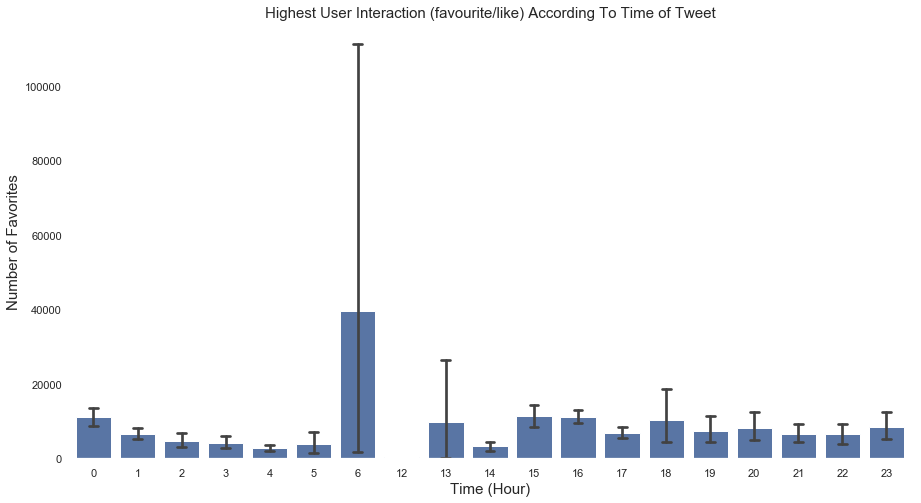

In [68]:
base_color = base_color = sns.color_palette()[0]
tw_tvf = sns.barplot(x ='t_time_a',y='favorite_count',data=tw_DF, capsize=0.2, color=base_color)
tw_tvf.set_xlabel("Time (Hour)", fontsize = 15)
tw_tvf.set_ylabel("Number of Favorites", fontsize = 15)
tw_tvf.set_title("Highest User Interaction (favourite/like) According To Time of Tweet", fontsize = 15)

#### 7.1.2 Comments on "Highest User Interaction (favourite/like) According To Time of Tweet" graph
From an initial inspection one could assume that tweeting at 6:00 would ensure the highest user interaction. However, when considering the error bar at 6:00am it is quite likely that the amount of observations (tweets) done at this time were quite low, hence the high error. 

Therefore, it would seem that the best time to tweet would be at 15:00 or 16:00, mainly due to their number of likes and low error bar.

Text(0.5, 1.0, 'Highest User Interaction (Retweet) According To Time of Tweet')

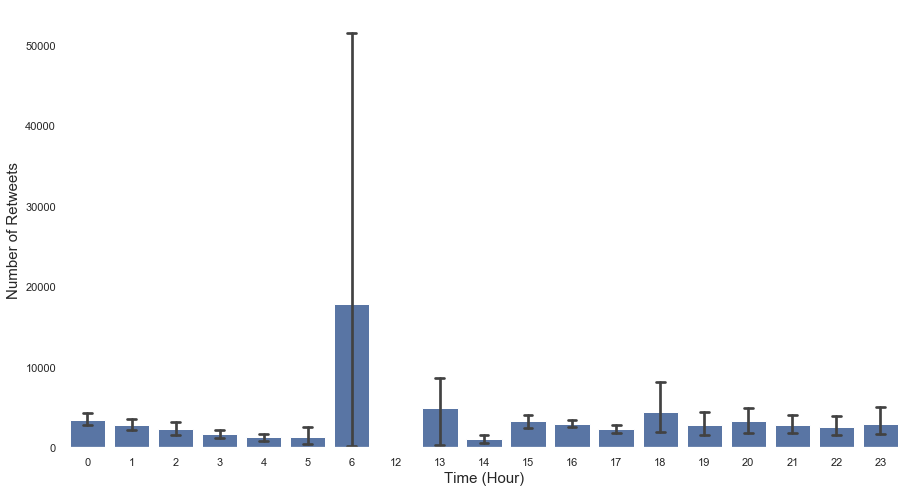

In [69]:
tw_tvrt = sns.barplot(x ='t_time_a',y='retweet_count',data=tw_DF, capsize=0.2, color=base_color)
tw_tvrt.set_xlabel("Time (Hour)", fontsize = 15)
tw_tvrt.set_ylabel("Number of Retweets", fontsize = 15)
tw_tvf.set_title("Highest User Interaction (Retweet) According To Time of Tweet", fontsize = 15)

#### 7.1.3 Comments on "Highest User Interaction (favourite/like) According To Time of Tweet" graph
Similarly to "Highest User Interaction (favourite/like) According To Time of Tweet" graph, the 6:00 tweets would seem to be the best time to tweet if one would like to maximise retweets. However, considering the high error bar, it is better to ignore this information.

It seems that not as many users retweet compared to user like/favourite. Nevertheless, it seems like both the "Highest User Interaction (favourite/like) According To Time of Tweet" and "Highest User Interaction (Retweet) According To Time of Tweet" graphs portray that both of these interaction happen at the same time peaks.

Text(0, 0.5, 'Number of Retweets')

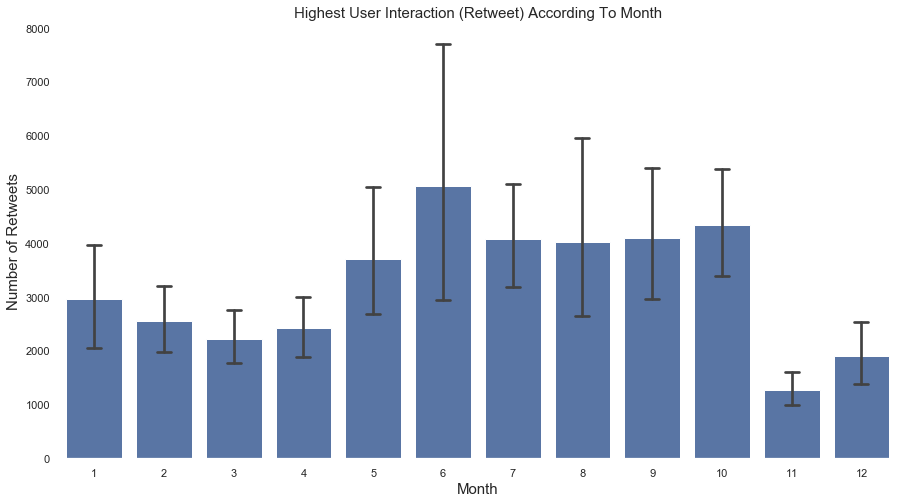

In [70]:
tw_rtvm = sns.barplot(x ='t_month',y='retweet_count',data=tw_DF, capsize=0.2, color=base_color)
tw_rtvm.set_title("Highest User Interaction (Retweet) According To Month", fontsize = 15)
tw_rtvm.set_xlabel("Month", fontsize = 15)
tw_rtvm.set_ylabel("Number of Retweets", fontsize = 15)

#### 7.1.4 Comments on "Highest User Interaction (retweet) According To Month of Tweet" graph

The months in which there is the most retweets would seemn to be starting June up until October, there seems to be a drastic drop of retweets in November.

Text(0, 0.5, 'Number of Likes')

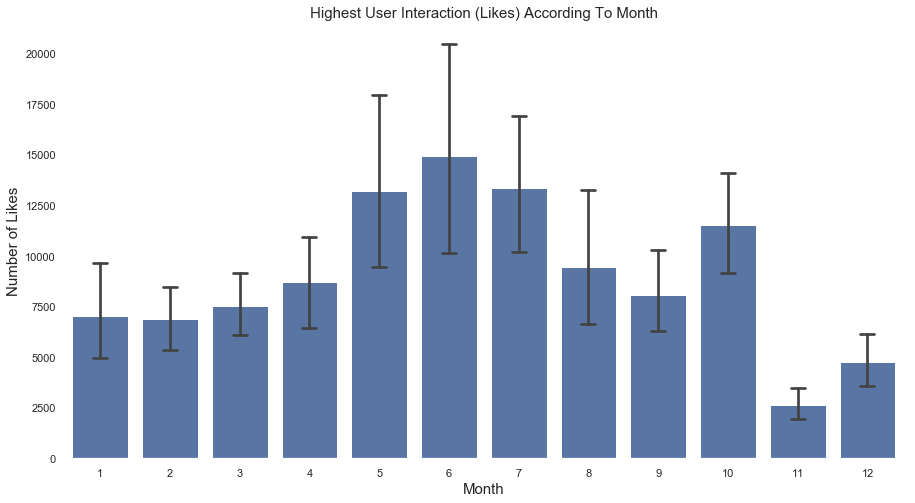

In [71]:
tw_lvm = sns.barplot(x ='t_month',y='favorite_count',data=tw_DF, capsize=0.2, color = base_color)
tw_lvm.set_title("Highest User Interaction (Likes) According To Month", fontsize = 15)
tw_lvm.set_xlabel("Month", fontsize = 15)
tw_lvm.set_ylabel("Number of Likes", fontsize = 15)

#### 7.1.5 Comments on "Highest User Interaction (favourite/like) According To Month of Tweet" graph

Similarly to the previous graph, the peak of user interaction is on June, however the months with the highest number of like would be May, June, July and OCtober. There seems to be a drop in likes between August and September but the drastic drop in November is also present on the likes v month graph.

Text(0.5, 1.0, 'Number of Tweets posted from an App')

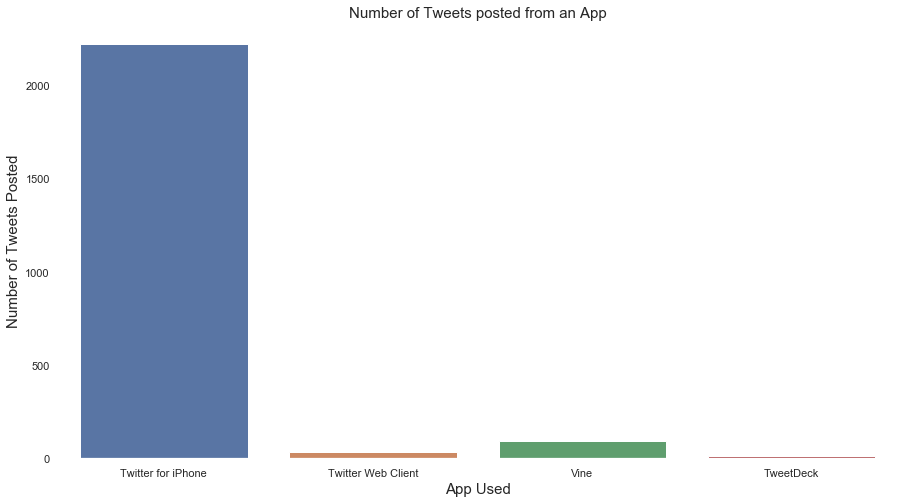

In [72]:
tw_source = sns.countplot(x ='clean_source',data=tw_DF)
tw_source.set_xlabel("App Used", fontsize = 15)
tw_source.set_ylabel("Number of Tweets Posted", fontsize = 15)
tw_source.set_title('Number of Tweets posted from an App', fontsize = 15)

#### 7.1.6 Comments on "Number of Tweets posted from an App" graph

It is quite clear that the account user posts most of is tweets from the Twitter app for iPhone, followed by vine shares (vine was a social app which is currently no longer available).

Text(0.5, 1.0, 'Most Used Dog Nickname According to Tweets')

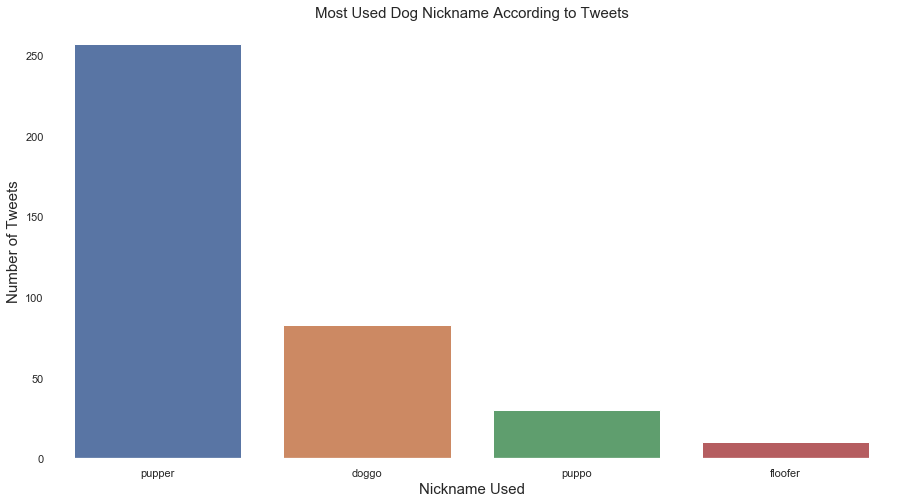

In [73]:
order = tw_DF.internet_nickname.value_counts().index
tw_nick = sns.countplot(x ='internet_nickname',data=tw_DF, order = order)
tw_nick.set_xlabel("Nickname Used", fontsize = 15)
tw_nick.set_ylabel("Number of Tweets", fontsize = 15)
tw_nick.set_title('Most Used Dog Nickname According to Tweets', fontsize = 15)

#### 7.1.7 Comments on "Most Used Dog Nickname According to Tweets" graph

It would seem that using the nickname pupper is the favourite dog nickname of the account user, followed by the popular doggo nickname.

Text(0.5, 1.0, 'Most Popular Top 12 Dog Breeds in tweets')

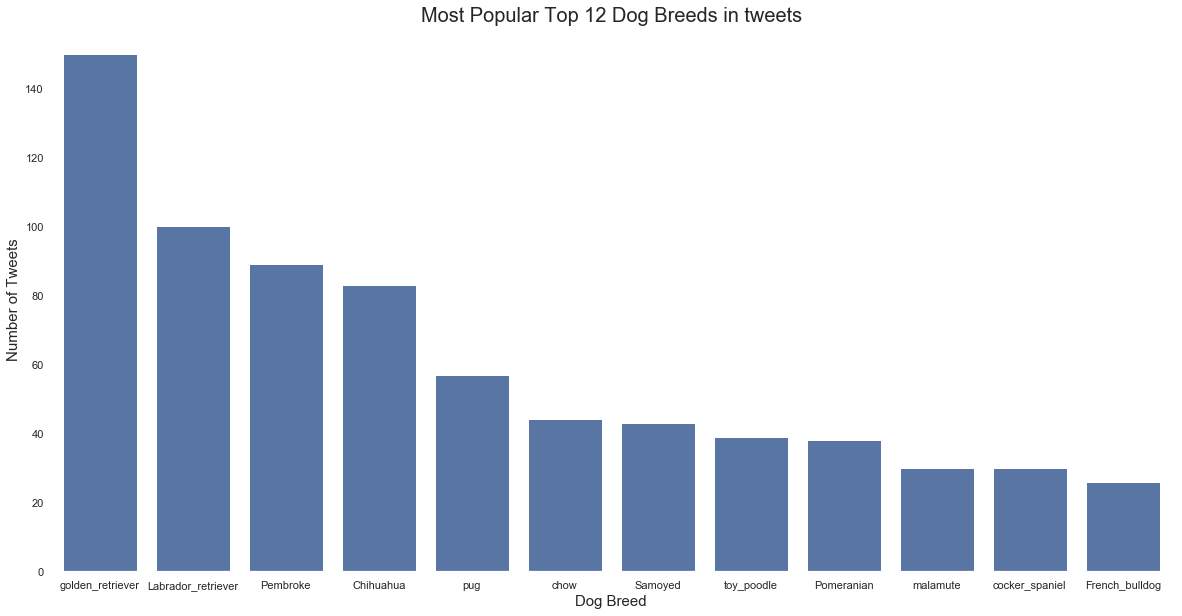

In [74]:
#In this section, we will filter any dog breeds that have not been tweeted at least 25 times; this is to calculate if there a bias for a specific breed.
plt.figure(figsize=[20,10])
p1_GB = tw_DF.groupby('p1').count()
dog_breed_names = list(p1_GB.index.values)
a = 0
for i in dog_breed_names:
    if p1_GB.tweet_id[i] < 25:
        p1_GB.drop(i,inplace = True)
dog_breed_names_up = list(p1_GB.index.values)
tw_DF_p1 = tw_DF.copy()
for x in range(2356):
    if tw_DF_p1.p1_dog[x] != True:
        tw_DF_p1.drop(x,inplace = True)
    else:
        if tw_DF_p1.p1[x] not in dog_breed_names_up:
            tw_DF_p1.drop(x,inplace = True)
order = tw_DF_p1.p1.value_counts().index
tw_b=sns.countplot(x ='p1',data=tw_DF_p1,color=base_color,order=order)
tw_b.set_xlabel("Dog Breed", fontsize = 15)
tw_b.set_ylabel("Number of Tweets", fontsize = 15)
tw_b.set_title('Most Popular Top 12 Dog Breeds in tweets', fontsize = 20)

#### 7.1.8 Comments on "Top 12 Dog Breeds mentioned in tweets and order" graph

Golden retrievers are the most popular breed mentioned in the tweets followed by labrador retrievers and pembrokes (corgi). However, this does not necessarily mean that the golden retrievers are the preferred dog breed of the account user.

Text(0.5, 1.0, 'Number of Favorites/Likes according to Most Popular Top 12 Dog Breeds')

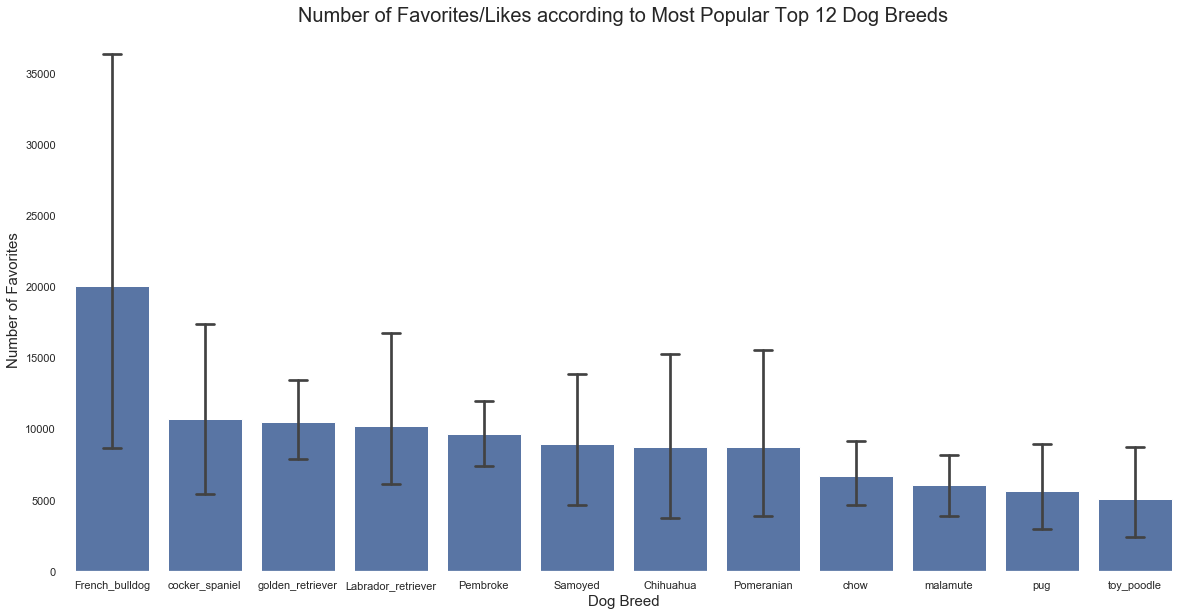

In [75]:
plt.figure(figsize=[20,10])
group_order = tw_DF_p1.groupby('p1').favorite_count.mean().reset_index().sort_values('favorite_count', ascending=False)
order = group_order.p1
tw_fvb=sns.barplot(x ='p1',y='favorite_count',data=tw_DF_p1, capsize=0.2, color=base_color, order=order)
tw_fvb.set_xlabel("Dog Breed", fontsize = 15)
tw_fvb.set_ylabel("Number of Favorites", fontsize = 15)
tw_fvb.set_title('Number of Favorites/Likes according to Most Popular Top 12 Dog Breeds', fontsize = 20)

#### 7.1.9 Comments on "Number of Favorites/Likes according to Most Popular Top 12 Dog Breeds " graph

Despite French Bulldogs being the least common dog breed of the top 12, it is one of the breeds with the highest amount of likes when mentioned on Twitter; followed by cocker spaniel and the golden retriever.

Text(0.5, 1.0, 'Number of Retweets according to Most Popular Top 12 Dog Breeds')

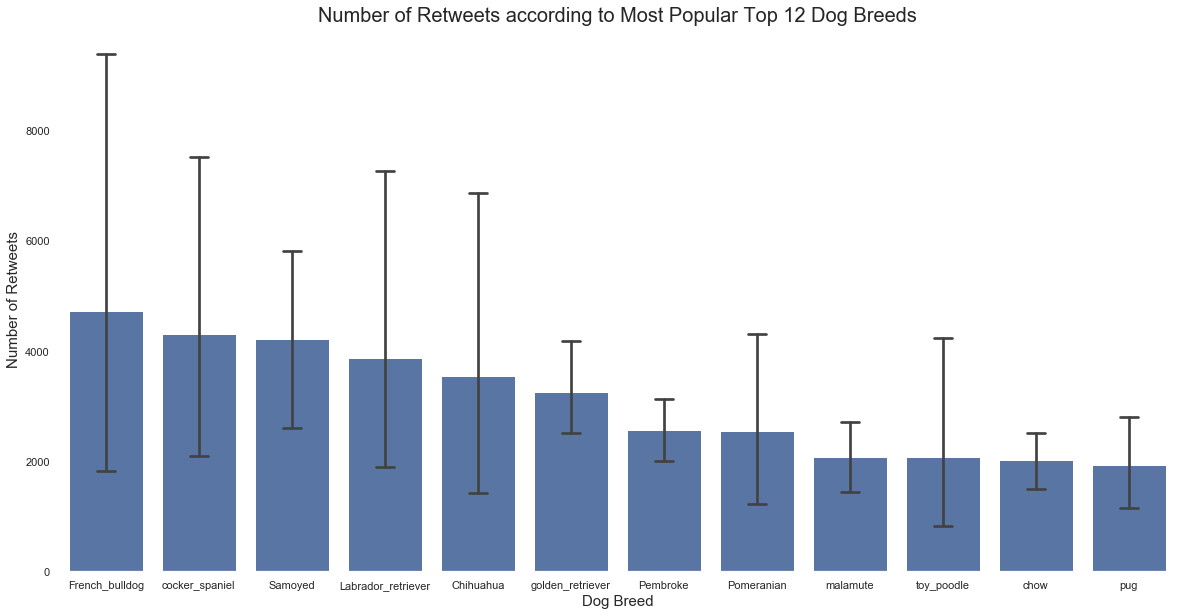

In [76]:
plt.figure(figsize=[20,10])
group_order = tw_DF_p1.groupby('p1').retweet_count.mean().reset_index().sort_values('retweet_count', ascending=False)
order = group_order.p1
tw_rtvb = sns.barplot(x ='p1',y='retweet_count',data=tw_DF_p1, capsize=0.2, order=order, color=base_color)
tw_rtvb.set_xlabel("Dog Breed", fontsize = 15)
tw_rtvb.set_ylabel("Number of Retweets", fontsize = 15)
tw_rtvb.set_title('Number of Retweets according to Most Popular Top 12 Dog Breeds', fontsize = 20)

#### 7.1.10 Comments on "Number of Retweets according to Most Popular Top 12 Dog Breeds" graph

Similarly to the previous graph, the most popular dog breed according to retweet interactions are the french bulldog and the cocker spaniel. However, the third most popular would be the samoyed which difers from the likes.

'0.11.2'

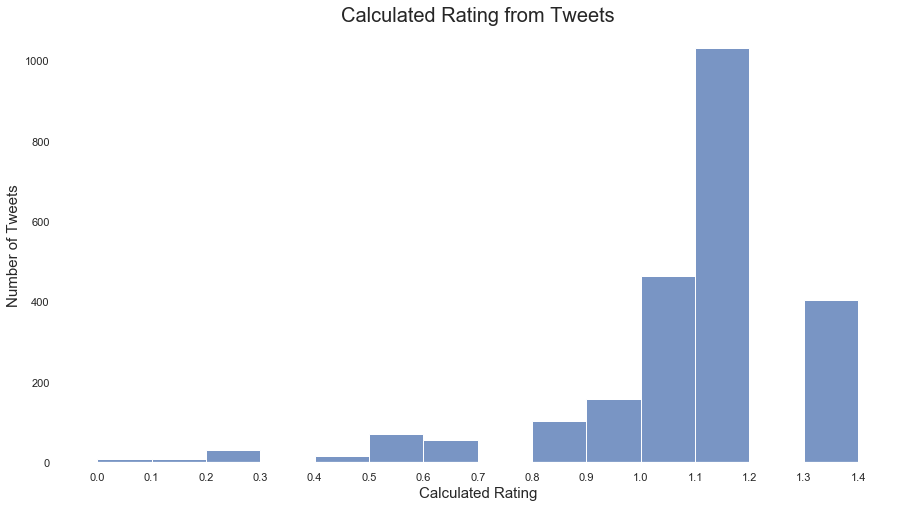

In [77]:
bins=np.arange(0,1.4+0.1,0.1)
tw_AR = sns.histplot(data=tw_DF, x ='Actual_Rating',  bins = bins);
tw_AR.set_xlabel("Calculated Rating", fontsize = 15)
tw_AR.set_ylabel("Number of Tweets", fontsize = 15)
tw_AR.set_title("Calculated Rating from Tweets", fontsize = 20)
plt.xticks(np.arange(0,1.4+0.1,0.1));
sns.__version__

In [78]:
sns.__version__

'0.11.2'

#### 7.1.11 Comments on "Calculated Rating from tweets" graph

Despite the denominator being 10, most of the scores given by the account user were above 10, this can be seen in the graphic when most of the calculated rating values are between 1.0 and 1.2 .

Text(0.5, 1.0, 'Calculated Rating of the Most Popular Top 12 Dog Breeds')

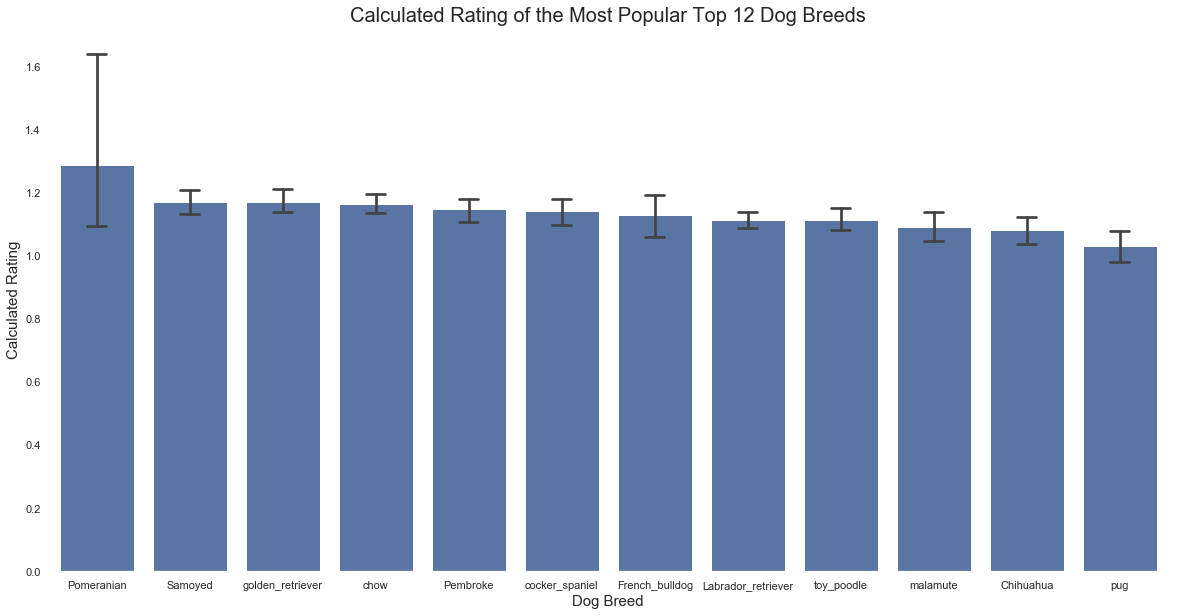

In [79]:
plt.figure(figsize=[20,10])
group_order_cr = tw_DF_p1.groupby('p1').Actual_Rating.mean().reset_index().sort_values('Actual_Rating', ascending=False)
order = group_order_cr.p1
tw_crvb = sns.barplot(x ='p1',y='Actual_Rating',data=tw_DF_p1, capsize=0.2, order=order, color=base_color)
tw_crvb.set_xlabel("Dog Breed", fontsize = 15)
tw_crvb.set_ylabel("Calculated Rating", fontsize = 15)
tw_crvb.set_title('Calculated Rating of the Most Popular Top 12 Dog Breeds', fontsize = 20)

#### 7.1.12 Comments on "Calculated Rating of Most Popular Top 12 Dog Breeds" graph

It would seem like the Pomeranian would have the highest calculated rating of all of the dog breeds, however this breed does have a large error bar. The rest of the top 12 popular breeds do have a very similar score, except for the pug breed which has the lowest and largest drop.

### Tweet Dataframe Insights
-   There is a positive correlation between "likes"/"favorite" with "retweets".
-   It seems that the actual or calculated rating does not have a strong relationship with the users interaction (favorite and retweets).
-   Tweets posted at 00:00, 15:00 and 16:00 have a considerable high level of interaction with followers (likes and retweets). However, note that users that "like" a tweet are more likely to retweet it.
-   Follower interaction is low beginning of the year and ramps up mid year (June to October with a drastic drop during November).
-   Tweets are mainly posted from an iPhone.
-   The preferred dog nickname for the account is pupper, followed by doggo.
-   Most of the dog breeds in the tweets are Retrievers (golden and labradors).
-   Despite having less tweets, French Bulldogs and Cocker Spaniels get the most user interaction. However, the third most "liked" dog breed was the golden retriever whilst the most "retweeted" dog breed was the samoyed.
-   Most of the calculated rating falls above 1.0, making the numerator always overshoot the denominator.
-   The dog breed with the highest calculated rating would be the Pomeranian. However, it is fair to mention that most of the dog breeds have a similar rating; except for pugs.


### 7.2 Retweet Dataframe

In [80]:
rt_DF.count()

tweet_id                    181
text                        181
retweeted_status_id         181
retweeted_status_user_id    181
expanded_urls               180
rating_numerator            181
rating_denominator          181
rt_date                     181
rt_year                     181
rt_month                    181
rt_day                      181
rt_time                     181
t_time_a                    181
rt_time_a                   181
clean_source                181
internet_nickname            36
clean_name                  176
jpg_url                      81
img_num                      81
p1                           81
p1_conf                      81
p1_dog                       81
p2                           81
p2_conf                      81
p2_dog                       81
p3                           81
p3_conf                      81
p3_dog                       81
favorite_count               89
retweet_count                89
Actual_Rating               181
dtype: i

In [81]:
rt_DF.corr()

,rating_numerator,rating_denominator,rt_year,rt_month,rt_day,t_time_a,rt_time_a,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,Actual_Rating
rating_numerator,1.000000,-0.045978,0.130697,-0.011720,-0.022971,-0.009464,0.118144,0.207664,-0.174379,0.013270,0.158190,NaN,0.207031,0.999926
rating_denominator,-0.045978,1.000000,-0.018387,-0.014035,-0.057873,0.108034,-0.073967,NaN,NaN,NaN,NaN,NaN,NaN,-0.058163
rt_year,0.130697,-0.018387,1.000000,-0.727410,-0.168795,-0.118667,0.091904,-0.018446,0.009254,0.020468,-0.025709,NaN,-0.106519,0.130838
rt_month,-0.011720,-0.014035,-0.727410,1.000000,0.127313,0.094361,-0.061227,0.127952,-0.041937,-0.068184,0.063976,NaN,-0.033272,-0.011541
rt_day,-0.022971,-0.057873,-0.168795,0.127313,1.000000,0.019221,-0.129158,-0.045382,0.023830,-0.066260,0.047153,NaN,-0.023724,-0.022249
t_time_a,-0.009464,0.108034,-0.118667,0.094361,0.019221,1.000000,0.121739,-0.070842,-0.177774,-0.129782,0.105892,NaN,-0.251589,-0.010778
rt_time_a,0.118144,-0.073967,0.091904,-0.061227,-0.129158,0.121739,1.000000,-0.145130,-0.207443,0.089878,0.165759,NaN,-0.039530,0.118973
img_num,0.207664,NaN,-0.018446,0.127952,-0.045382,-0.070842,-0.145130,1.000000,0.182426,-0.236799,-0.099436,NaN,0.166124,0.207664
p1_conf,-0.174379,NaN,0.009254,-0.041937,0.023830,-0.177774,-0.207443,0.182426,1.000000,-0.564079,-0.754675,NaN,0.041666,-0.174379
p2_conf,0.013270,NaN,0.020468,-0.068184,-0.066260,-0.129782,0.089878,-0.236799,-0.564079,1.000000,0.436125,NaN,0.028832,0.013270


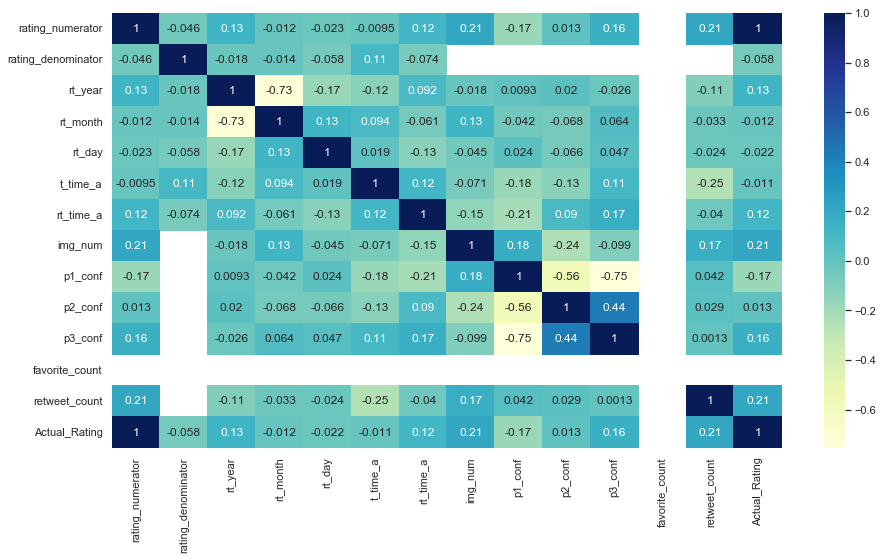

In [82]:
sns.heatmap(rt_DF.corr(), cmap="YlGnBu", annot=True)

#### 7.2.1 Comments on "Correlation Between Tweet Dataframe Columns" graph
Similarly to the Tweets dataframe, Most of the high correlations can be seen mainly on the p1, p2 and p3 confidence.

p1, p2 and p3 having an inverse relationship makes sense since if p1 is low, it is likely that either p2 or p3 a greater than p1.

Text(0.5, 1.0, 'Dog Nickname Used in Retweets')

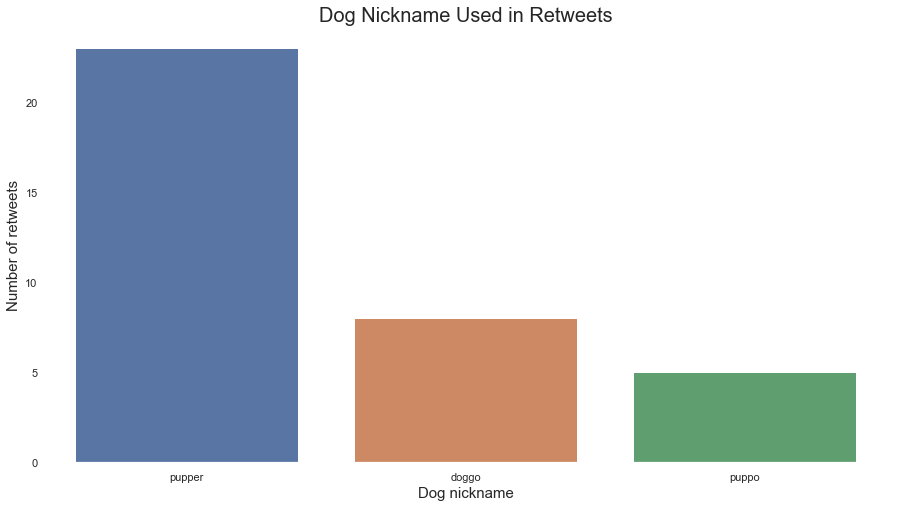

In [83]:
rt_nvc = sns.countplot(x ='internet_nickname',data=rt_DF)
rt_nvc.set_xlabel('Dog nickname',size=15)
rt_nvc.set_ylabel('Number of retweets',size=15)
rt_nvc.set_title('Dog Nickname Used in Retweets',size=20)

#### 7.2.2 Comments on "Dog Nickname Used in Retweets" graph
It seems that whilst performing retweets, the nicknames used for dogs slightly vary. It seems that compared to the tweets, the account user uses the nickname "puppo" more frequently.

#### 7.2.3 Insights
-   There seems to be a slight negative relationship between the actual or calculated rating of the dog with the confidence of the ML image algorithm. A theory would be that non easily distinguishible dogs or mixed breeds get higher ratings, however this would only work with tweets that have been retweeted.
-   There are no 'floofer's in retweets and 'pupper' is the preferred nickname for dogs.

### 7.3 Reply Dataframe

In [84]:
r_DF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 30 to 2298
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               78 non-null     object 
 1   in_reply_to_status_id  78 non-null     string 
 2   in_reply_to_user_id    78 non-null     string 
 3   text                   78 non-null     object 
 4   expanded_urls          23 non-null     object 
 5   rating_numerator       78 non-null     int64  
 6   rating_denominator     78 non-null     int64  
 7   clean_source           78 non-null     object 
 8   internet_nickname      8 non-null      object 
 9   clean_name             78 non-null     object 
 10  jpg_url                23 non-null     object 
 11  img_num                23 non-null     float64
 12  p1                     23 non-null     object 
 13  p1_conf                23 non-null     float64
 14  p1_dog                 23 non-null     object 
 15  p2   

In [85]:
r_DF.corr()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,retweet_count,Actual_Rating
rating_numerator,1.000000,0.016655,0.235722,-0.270165,-0.218095,-0.023309,-0.051911,-0.105154,0.018715
rating_denominator,0.016655,1.000000,0.215744,-0.286752,-0.188255,-0.009441,-0.007616,0.036388,-0.010171
img_num,0.235722,0.215744,1.000000,0.374387,-0.157008,-0.460827,0.311687,0.210570,0.197963
p1_conf,-0.270165,-0.286752,0.374387,1.000000,-0.463998,-0.707991,0.245196,0.172729,0.157629
p2_conf,-0.218095,-0.188255,-0.157008,-0.463998,1.000000,0.588123,-0.450316,-0.303748,-0.293750
p3_conf,-0.023309,-0.009441,-0.460827,-0.707991,0.588123,1.000000,-0.217276,-0.144193,-0.135388
favorite_count,-0.051911,-0.007616,0.311687,0.245196,-0.450316,-0.217276,1.000000,0.720869,0.107860
retweet_count,-0.105154,0.036388,0.210570,0.172729,-0.303748,-0.144193,0.720869,1.000000,0.144110
Actual_Rating,0.018715,-0.010171,0.197963,0.157629,-0.293750,-0.135388,0.107860,0.144110,1.000000


#### 7.2.3 Insights
The "Reply" dataframe only has a total of 78 observations, meaning that the information that could be potentially extracted from this dataframe might not be representative.


## 8.0 Reporting

The final report can be found as a pdf under the name act_report.pdf